# Regularization
* Here data is `X_Y_Sinusoid_Data.csv` 

In [3]:
import pandas as pd
import os
import numpy as np

# Import the data using the file path
data_path = ['C:\IntelPython3\projects']
filepath = os.sep.join(data_path + ['X_Y_Sinusoid_Data.csv'])

data = pd.read_csv(filepath, sep=',')

# Answer 1
* generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$
* plot x and y i.1 sparse data    

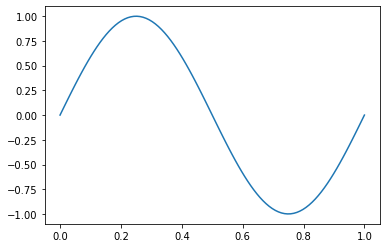

In [4]:
import matplotlib.pylab as plt
X=np.linspace(0,1,num=100)
y=np.sin(2*X*np.pi)
plt.plot(X,y)


# Output 1
**Graph with x axis as X and y axis as y i.e sin data**

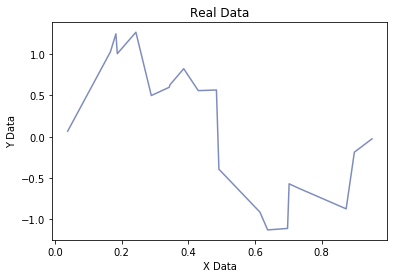

In [5]:
import matplotlib.pylab as plt
import seaborn as sns
sns.set_palette('dark')
a=plt.axes()
a.set(xlabel='X Data',ylabel='Y Data',title='Real Data')
a.plot(data.x,data.y,alpha=.5)

# Output 2
* graph with x axis as X data and y axis as Y data

# Answer 2


* Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
* Fit this data using linear regression. 
* Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
p=PolynomialFeatures(20)
X_data=data['x'].values.reshape(-1,1)
Xp=p.fit_transform(X_data)
LR=LR.fit(Xp,data['y'])
ypredict=LR.predict(Xp)
ypredict


array([ 0.06542969,  1.03027344,  1.24316406,  1.00732422,  1.26464844,
        0.5       ,  0.55908203,  0.67138672,  0.8203125 ,  0.56005859,
        0.56152344, -0.39160156, -0.9140625 , -1.12988281, -1.109375  ,
       -0.57177734, -0.62109375, -0.86425781, -0.18066406, -0.00878906])

# plot of equally sized data i.e x and y

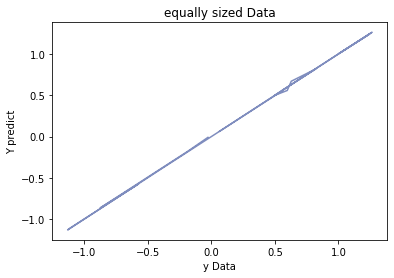

In [7]:
import matplotlib.pylab as plt
import seaborn as sns
sns.set_palette('dark')
a=plt.axes()
a.set(xlabel='y Data',ylabel='Y predict',title='equally sized Data')
a.plot(data['y'],ypredict,alpha=.5)

## Question 3

* Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001). 
* Plot the results, as was done in Question 1. 
* Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude. 

What does the comparatively large magnitude of the data tell you about the role of regularization?

**Performing ridge regression on real Data**

In [8]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.001)
r=r.fit(Xp,data['y'])
ypredr=r.predict(Xp)
r.coef_

array([  0.        ,   6.065176  , -12.42963492,  -4.07012661,
         2.30719442,   4.43254976,   4.13519998,   2.88350728,
         1.48463604,   0.30792676,  -0.52276669,  -1.00835922,
        -1.20467118,  -1.1842723 ,  -1.01727186,  -0.76299398,
        -0.4675777 ,  -0.16454396,   0.12336262,   0.3819731 ,
         0.60359108])

**Performing lasso regression on real Data**

In [9]:
from sklearn import linear_model
lm=linear_model.Lasso(alpha=0.0001)
lm=lm.fit(Xp,data['y'])
ypredlm=lm.predict(Xp)
#np.sqrt(lm.coef_**2+r.coef_**2)
lm.coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4469570520796863, tolerance: 0.0012227586753890333
  positive)


array([ 0.00000000e+00,  8.49049951e+00, -2.01767083e+01,  1.64135271e+00,
        5.69848812e+00,  4.60193904e+00,  2.17090495e+00,  2.52180755e-01,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -6.95109030e-01,
       -6.99207087e-01, -5.69071337e-01, -2.79483479e-01, -4.92199451e-02,
       -4.87309470e-02, -1.32960483e-01, -7.09843487e-03, -0.00000000e+00,
       -0.00000000e+00])

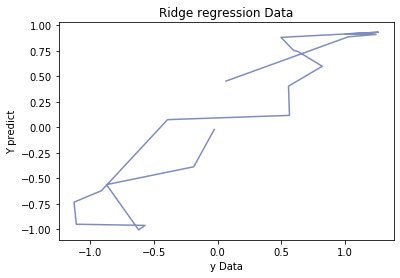

In [10]:
import matplotlib.pylab as plt
import seaborn as sns
sns.set_palette('dark')
a=plt.axes()
a.set(xlabel='y Data',ylabel='Y predict',title='Ridge regression Data')
a.plot(data['y'],ypredr,alpha=.5)

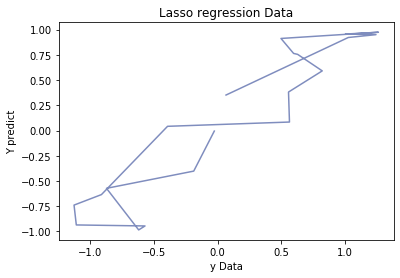

In [11]:
sns.set_palette('dark')
a=plt.axes()
a.set(xlabel='y Data',ylabel='Y predict',title='Lasso regression Data')
a.plot(data['y'],ypredlm,alpha=.5)

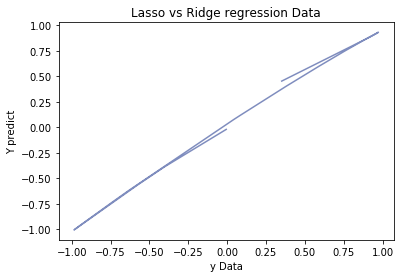

In [12]:
sns.set_palette('dark')
a=plt.axes()
a.set(xlabel='y Data',ylabel='Y predict',title='Lasso vs Ridge regression Data')
a.plot(ypredlm,ypredr,alpha=.5)

**plot between ridge and lasso coefficients**

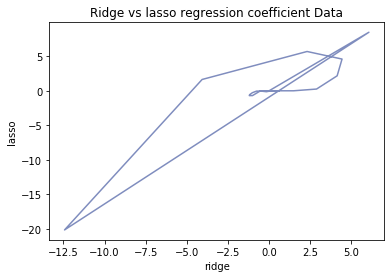

In [13]:
sns.set_palette('dark')
a=plt.axes()
a.set(xlabel='ridge',ylabel='lasso',title='Ridge vs lasso regression coefficient Data')
x=r.coef_
y=lm.coef_
a.plot(x,y,alpha=.5)

**plot between magnitude of ridge and lasso vs Linear regression**

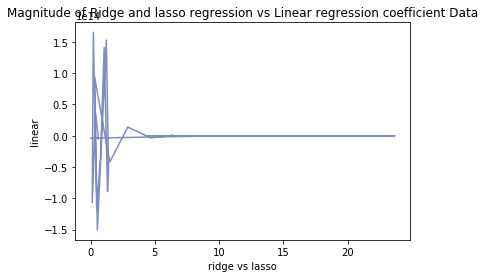

In [14]:
sns.set_palette('dark')
a=plt.axes()
a.set(xlabel='ridge vs lasso',ylabel='linear',title='Magnitude of Ridge and lasso regression vs Linear regression coefficient Data')
x=np.sqrt(r.coef_**2+lm.coef_**2)
y=LR.coef_
a.plot(x,y,alpha=.5)

# Answer 4
* Now we will be working on with previous week linear regression's data i.e 'Ames_Housing_Sales'

In [37]:
data_path=['C:\IntelPython3\projects']
filepath = os.sep.join(data_path + ['Ames_Housing_Sales.csv'])
data = pd.read_csv(filepath, sep=',')
Stringdata=data.select_dtypes(include=[object])
dataint=data.drop(columns=Stringdata.columns)
dataint

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,6,0.0,0.0,7,953.0,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010,142125.0


To begin:

* Import the data with Pandas, remove any null values, and one hot encode categoricals. Either Scikit-learn's feature encoders or Pandas `get_dummies` method can be used.
* Split the data into train and test sets. 
* Log transform skewed features. 
* Scaling can be attempted, although it can be interesting to see how well regularization works without scaling features.

In [38]:
# def removenull(row):
#     if None in row or 'null' in row or 'Nan' in row:
#         row.replace('null',0)
#     else:
#         return row

In [39]:
import re
#dataint=dataint.apply(lambda x: x.replace('null',0) if 'null' in x  else(x.replace('None',0) if 'None' in x else 0))
# Now one hot encode string data

dataint.replace('null',0)
dataint.replace('null',0)
dataint.replace('null',0)
Stringdata=pd.get_dummies(Stringdata)
sd=list(Stringdata.columns)
l=[]
al=list(map(lambda x: re.findall(r"\w+_None",x) if x in re.findall(r"\w+_None",x) else 0,Stringdata.columns))
for i in al:
    if type(i)==list:
        Stringdata=Stringdata.drop(columns=i)
Stringdata

,Alley_Grvl,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_TA,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1375,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
1376,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
1377,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


In [40]:
#concat data i.e stringdata and data int
from sklearn.model_selection import train_test_split
data1=pd.concat([Stringdata,dataint])
X=[i for i in data1.columns if i!='SalePrice']
X_data=data1[X]
Y_data=data1['SalePrice']
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data, test_size=0.3,random_state=42)

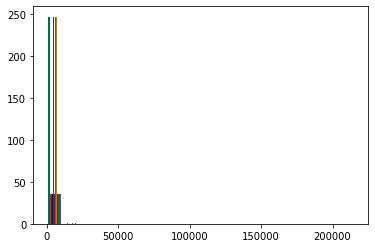

In [44]:
import matplotlib.pylab as plt

# X=[i for i in X_train.columns]
# X_skew=data1[X].skew()
# Y_skew=Y_train.skew()

test=plt.hist(X_train,bins=20)# by this we can say its positively skewed that is its right skew


**how to find theoritically whether a data is skewed or not**

In [45]:
from scipy.stats import shapiro
shapiro(data['SalePrice'])[1]<=0.05# and this value should not be <0.05

True

**Another method to find skew data**

In [36]:
#take out float columns
floatcols=X_train.select_dtypes(include=['float'])
yskew=pd.Series()
xskew = X_train[floatcols.columns].skew().sort_values(ascending=False)
yskew['SalePrice']=Y_train.skew()
skewdata=pd.concat([xskew,yskew])
skewness=pd.DataFrame({'Skew':skewdata})
skewness

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

**Log Transformation**
* For getting rid of skewness in the data we use certain tranformations , log tranformation is the best to attain normal distribution

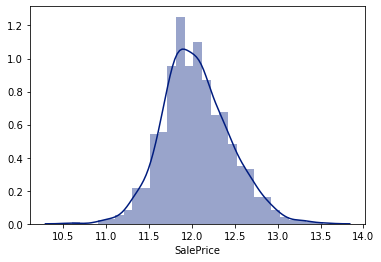

In [22]:
log_y=np.log(Y_train)
sns.distplot(log_y)

In [51]:
# change total data to traansformed data
import sys
pd.options.mode.chained_assignment = None

X=[i for i in skewness.columns if i!='SalePrice']
# for i in X:

for i in skewness.index.tolist():
    if i!='SalePrice':
        X_train[i]=np.log1p(X_train[i])
        X_test[i]=np.log1p(X_test[i])
X_train

,Alley_Grvl,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_TA,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.328770,0.328770,NaN,NaN,0.378058,0.723835,0.689994,0.745434,0.745434,0.745807
804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.378058,0.378058,NaN,NaN,0.412284,0.733204,0.679830,0.745360,0.745360,0.745828
351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.328770,0.248924,NaN,NaN,0.248924,0.726865,NaN,0.745223,0.745223,0.745838
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# R & D
* why only train data ? why not test data
* why skew? test?
* why normal distribution?
* why are we not using skewed data ?

In [30]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
X_train=minmax.fit_transform(X_train)
X_test=minmax.fit_transform(X_test)
type(X_train)

numpy.ndarray

## Answer 5

* Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.  


In [24]:
def rmse(yreal,yprediction):
    return mean_squared_error(yreal,yprediction)

* Fit a basic linear regression model
* print the root-mean-squared error for this model
* plot the predicted vs actual sale price based on the model.  

In [26]:
LR=LinearRegression()
# LR=LR.fit(X_train,Y_train)
# y_predict=LR.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').